### A Data Visualization of New York City AirBNB's

Hello!
We are here to explore some data analysis of AirBNB's in New York City
Let's start with these packages and load in our data:

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
from sklearn.cluster import KMeans
import pickle
import statistics
import folium
import requests
import datetime
import re
from bs4 import BeautifulSoup
import sklearn.feature_extraction.text

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('gdrive/My Drive/Datathon/property_data.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Section 1: Cleaning the Data

Now that we have loaded our dataset, we are going to take a look at what columns we have

In [4]:
print(data.columns.values)

['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']


We are going to clean up our data and fill in some missing data. From this, we are looking at potential investments and for that, we need prices. So, let's take away any rows that don't have reasonable prices, and let's keep only the data that we need.
The following command is to remove those columns from the dataset.

In [5]:
data = data.loc[data['price'] >= 35]
data = data.drop(labels=["name", "host_name", "last_review", "reviews_per_month", 'availability_365'], axis=1)

## Section 2: Organizing the Data with Alternative Methods

Now, let's make 2 lists: the boroughs of NYC and the types of rooms that are being rented out.

In [6]:
boroughs = list(data['neighbourhood_group'].unique())
types = list(data['room_type'].unique())
print(boroughs)
print(types)

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
['Private room', 'Entire home/apt', 'Shared room']


Now, accessing the dataset has it's own challenges expecialy when trying to find more and more specific data. So, we will create a dictionary called "room_data" which lists all the boroughs and in those, we will list the nieghborhoods, and the types of rooms that are in the dataset. Then, for each room type, we will store the list of prices from the dataset that coordinate with their category. Afterward, we use this data to tally up the number of properties, calculate the average and median.

Below, is the code and the output of that to get a better idea.

In [7]:
room_data = {}

for b in boroughs:
    room_data[b] = {'list_of_nhoods': []}
    for r in types:
      room_data[b][r] = {'number': 0,'avg_cost': 0, 'median': 0, 'list_of_costs': []}


for index, row in data.iterrows():
  room_data[row['neighbourhood_group']][row['room_type']]['list_of_costs'].append(row['price'])
  room_data[row['neighbourhood_group']][row['room_type']]['number'] += 1
  if row['neighbourhood'] not in room_data[row['neighbourhood_group']]['list_of_nhoods']:
    room_data[row['neighbourhood_group']]['list_of_nhoods'].append(row['neighbourhood'])

for b in boroughs:
  for r in types:
    room_data[b][r]['list_of_costs'].sort()
    room_data[b][r]['avg_cost'] = round(sum(room_data[b][r]['list_of_costs']) / len(room_data[b][r]['list_of_costs']), 2)
    room_data[b][r]['median'] = statistics.median(room_data[b][r]['list_of_costs'])

for b in boroughs:
  print(b)
  print(room_data[b]['list_of_nhoods'])
  for r in types:
    print(r + ": Number: " + str(room_data[b][r]['number']) + " Avg Cost: " + str(room_data[b][r]['avg_cost']) + " Median Cost: " + str(room_data[b][r]['median']))

Brooklyn
['Kensington', 'Clinton Hill', 'Bedford-Stuyvesant', 'South Slope', 'Williamsburg', 'Fort Greene', 'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Greenpoint', 'Bushwick', 'Flatbush', 'Prospect-Lefferts Gardens', 'Prospect Heights', 'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill', 'Boerum Hill', 'DUMBO', 'East Flatbush', 'Gravesend', 'East New York', 'Sheepshead Bay', 'Fort Hamilton', 'Bensonhurst', 'Sunset Park', 'Brighton Beach', 'Cypress Hills', 'Bay Ridge', 'Columbia St', 'Vinegar Hill', 'Canarsie', 'Borough Park', 'Downtown Brooklyn', 'Midwood', 'Red Hook', 'Sea Gate', 'Navy Yard', 'Brownsville', 'Manhattan Beach', 'Dyker Heights', 'Bergen Beach', 'Coney Island', 'Bath Beach', 'Mill Basin']
Private room: Number: 9823 Avg Cost: 78.0 Median Cost: 65
Entire home/apt: Number: 9545 Avg Cost: 178.56 Median Cost: 145
Shared room: Number: 252 Avg Cost: 65.75 Median Cost: 45.0
Manhattan
['Midtown', 'Harlem', 'East Harlem', 'Murray Hill', "Hell's Kit

## Section 3: Graphing basic data

We will now graph the number of places of each type in each borough

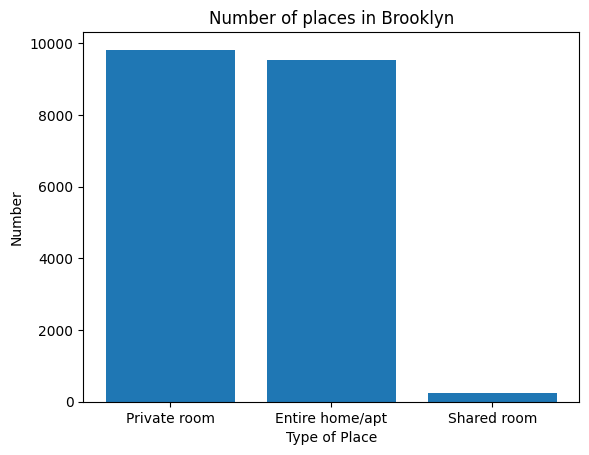

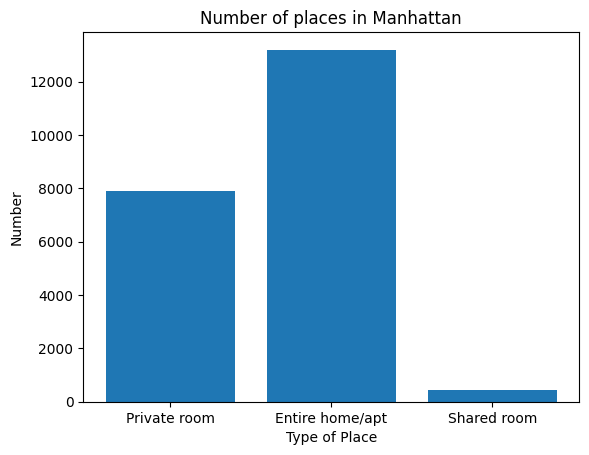

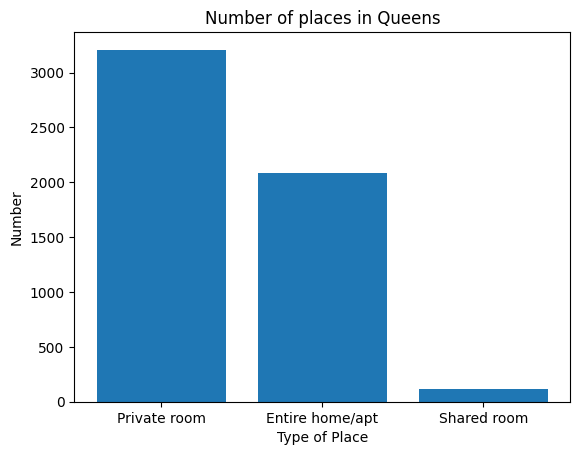

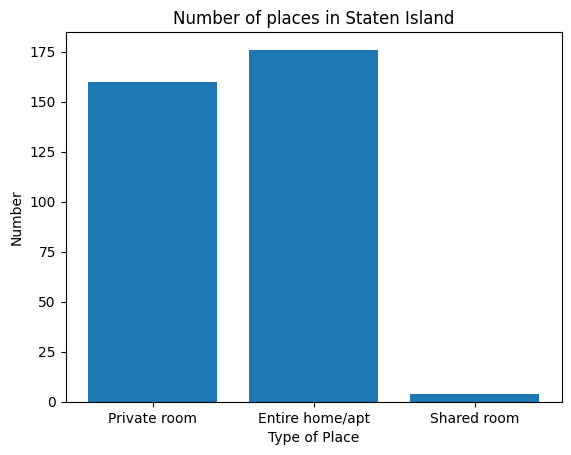

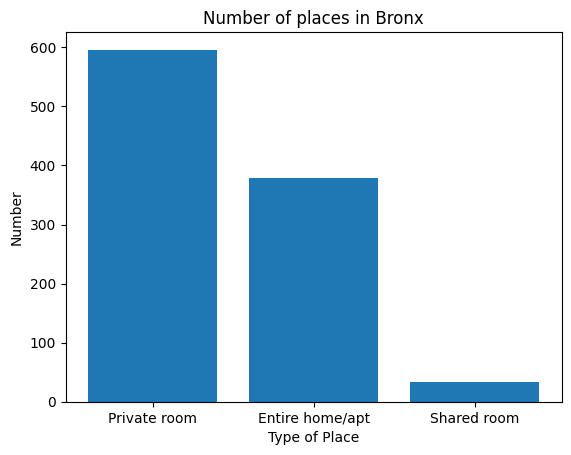

In [8]:
for b in room_data.keys():
  num = []
  for r in types:
    num.append(room_data[b][r]['number'])
  plt.bar(list(room_data[b].keys())[1::], num)
  plt.title("Number of places in " + str(b))
  plt.xlabel("Type of Place")
  plt.ylabel("Number")
  plt.show()

Here, we are graphing the average cost of a property of each type in each borough:

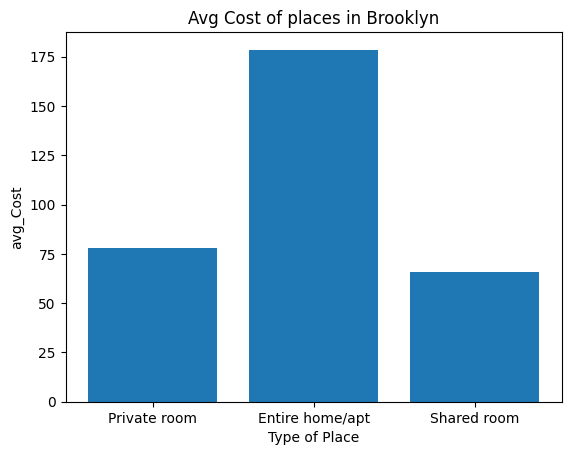

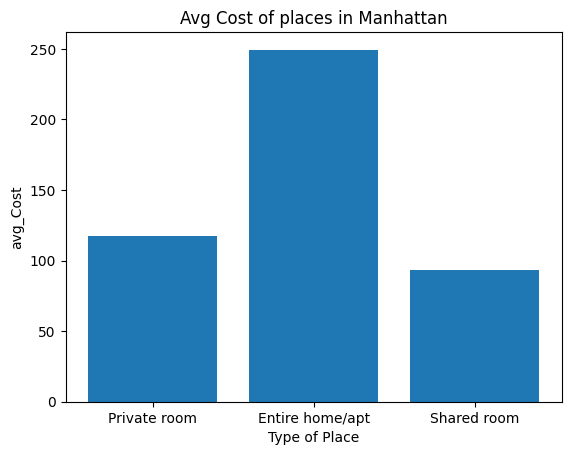

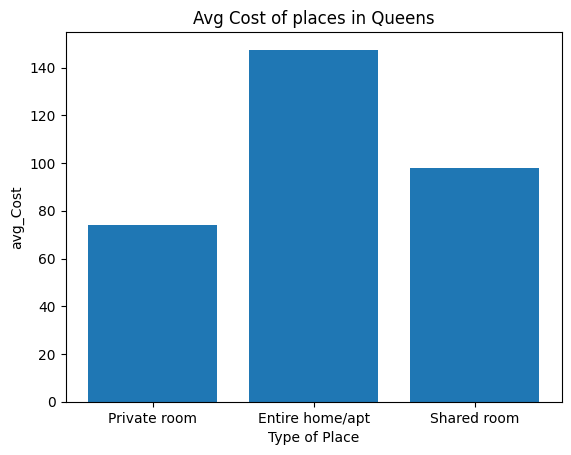

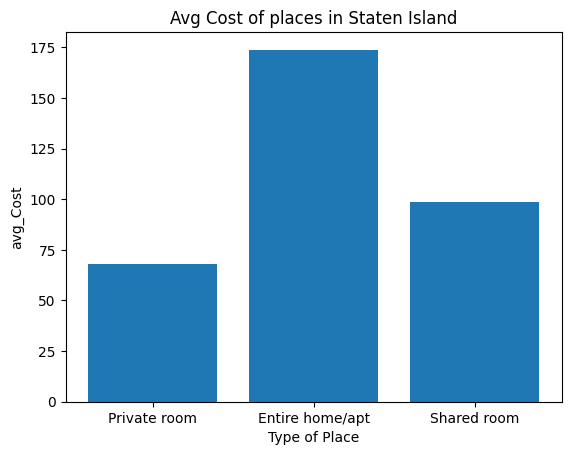

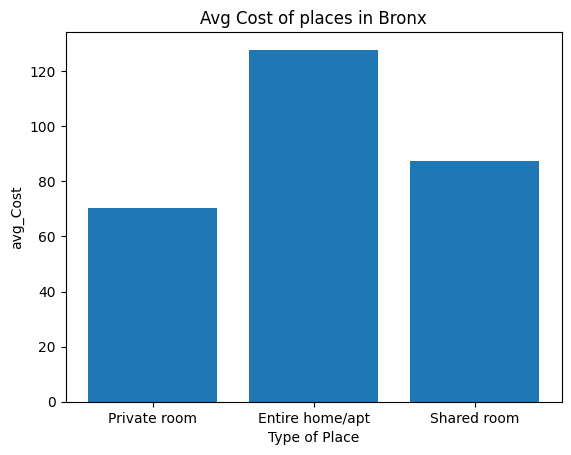

In [9]:
for b in room_data.keys():
  cost = []
  for r in types:
    cost.append(room_data[b][r]['avg_cost'])
  plt.bar(list(room_data[b].keys())[1::], cost)
  plt.title("Avg Cost of places in " + str(b))
  plt.xlabel("Type of Place")
  plt.ylabel("avg_Cost")
  plt.show()

Here, we are graphing the median cost of a property of each type in each borough:

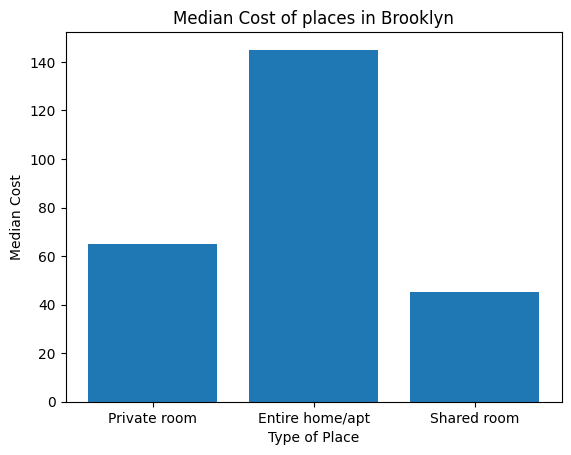

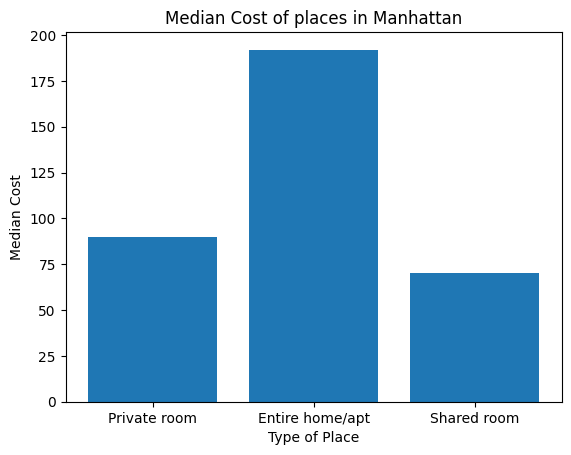

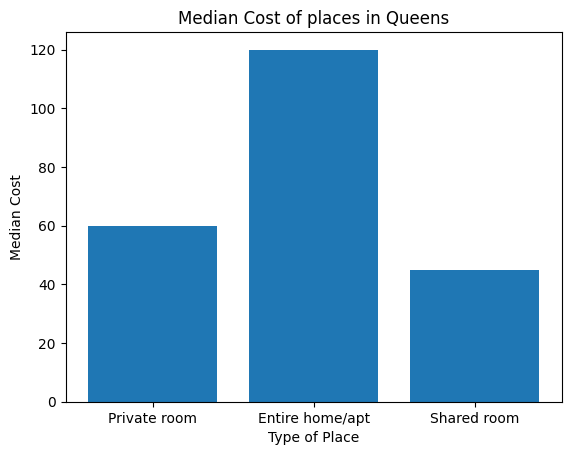

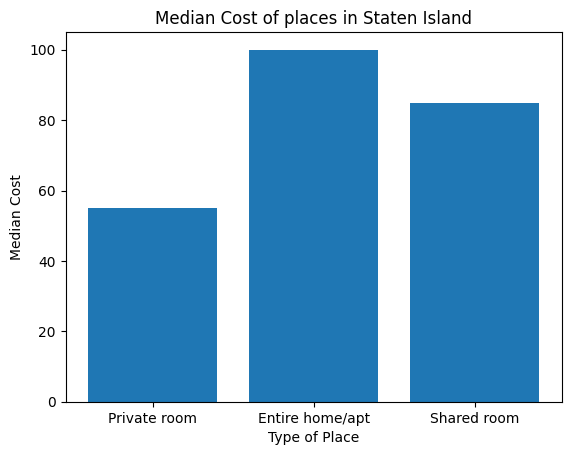

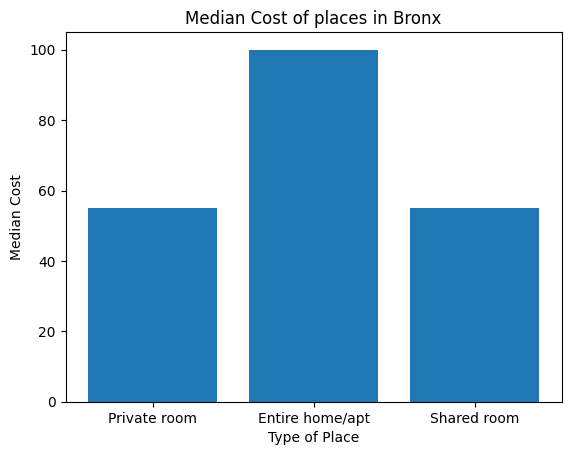

In [10]:
for b in room_data.keys():
  m_cost = []
  for r in types:
    m_cost.append(room_data[b][r]['median'])
  plt.bar(list(room_data[b].keys())[1::], m_cost)
  plt.title("Median Cost of places in " + str(b))
  plt.xlabel("Type of Place")
  plt.ylabel("Median Cost")
  plt.show()

## Section 4: KMeans Clustering

# Section 4.1: Making all the data numerical for KMeans

Here, we want to find out how many neighborhoods are in each borough

In [11]:
for b in boroughs:
  print(len(room_data[b]['list_of_nhoods']))

47
32
51
43
48


Here, we are making an array of floats from 0.01 to 0.51 since we found out that the largest number of neighborhoods in a borough is 51.

In [12]:
float_adds = []
for i in range(1, 52):
  float_adds.append(float(i/100))
print(float_adds)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51]


To change the word data into numerical data, we will think of each borough relative to their position in the boroughs list and each neighborhood to it's position in the dictionary room_data. We will match the neighborhood's position in room_data[insert borough]['list_of_nhoods'] list and match it with the decimal list we have created above and add that to a numerical representation of the boroughs.

In [13]:
borough_data = data['neighbourhood_group'].copy()
room_type_data = data['room_type'].copy()
neighborhood = data['neighbourhood'].copy()
for index, row in data.iterrows():
  data.at[index, 'room_type'] = types.index(row['room_type']) + 1
  num = boroughs.index(row['neighbourhood_group']) + 1
  data.at[index, 'neighbourhood_group'] = num
  data.at[index, 'neighbourhood'] = num + float_adds[room_data[row['neighbourhood_group']]['list_of_nhoods'].index(row['neighbourhood'])]


We now have a fully numerical dataset which is ready for KMeans Clustering!

In [14]:
data

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,2539,2787,1,1.01,40.64749,-73.97237,1,149,1,9,6
1,2595,2845,2,2.01,40.75362,-73.98377,2,225,1,45,2
2,3647,4632,2,2.02,40.80902,-73.94190,1,150,3,0,1
3,3831,4869,1,1.02,40.68514,-73.95976,2,89,1,270,1
4,5022,7192,2,2.03,40.79851,-73.94399,2,80,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,1,1.03,40.67853,-73.94995,1,70,2,0,2
48891,36485057,6570630,1,1.11,40.70184,-73.93317,1,40,4,0,2
48892,36485431,23492952,2,2.02,40.81475,-73.94867,2,115,10,0,1
48893,36485609,30985759,2,2.05,40.75751,-73.99112,3,55,1,0,6


# Section 4.2: The Clustering

First, we make this into a numpy array to fit everything and then we make a graph to determine the optimal number of clusters to have. If there are warnings, pay no mind because those are only to warn pepole about version changes which have no bearing in this case.

In [15]:
x  = np.array(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

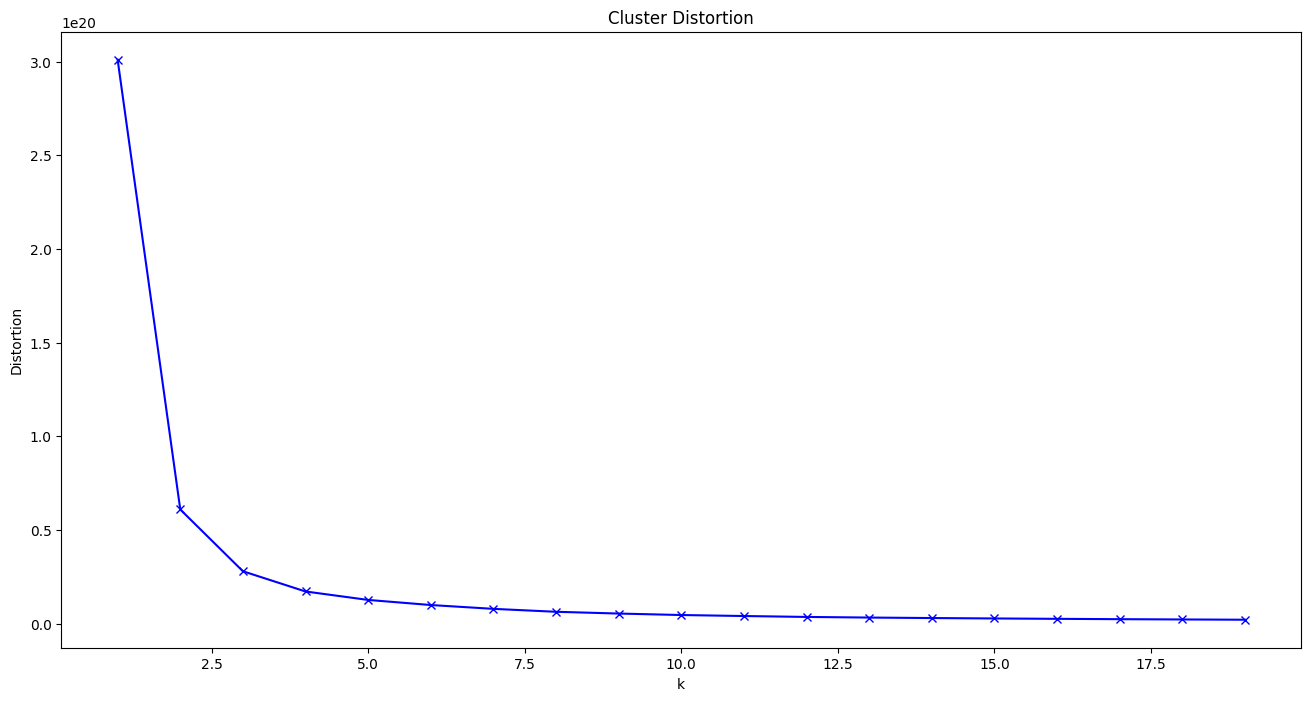

In [16]:
distortions = []
K = range(1,20)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Cluster Distortion')
plt.show()

Above, we can see that 4 is a good number to start with.

Now, we fit the data and cluster is to 4 clusters

In [17]:
kmeans_model = KMeans(n_clusters=4, init='k-means++')
kmeans_predict = kmeans_model.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let's tally up and see how many of which cluster we have. Also, we should make a new dataframe because when adding a column, it's always good to make a copy.

In [18]:
frame = pd.DataFrame(data)
frame['cluster'] = kmeans_predict
frame['borough'] = borough_data
frame['neighbourhood_name'] = neighborhood
frame['room_type_name'] = room_type_data
frame['cluster'].value_counts()

1    25490
2     9668
3     6404
0     6369
Name: cluster, dtype: int64

In [19]:
frame

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,cluster,borough,neighbourhood_name,room_type_name
0,2539,2787,1,1.01,40.64749,-73.97237,1,149,1,9,6,1,Brooklyn,Kensington,Private room
1,2595,2845,2,2.01,40.75362,-73.98377,2,225,1,45,2,1,Manhattan,Midtown,Entire home/apt
2,3647,4632,2,2.02,40.80902,-73.94190,1,150,3,0,1,1,Manhattan,Harlem,Private room
3,3831,4869,1,1.02,40.68514,-73.95976,2,89,1,270,1,1,Brooklyn,Clinton Hill,Entire home/apt
4,5022,7192,2,2.03,40.79851,-73.94399,2,80,10,9,1,1,Manhattan,East Harlem,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,1,1.03,40.67853,-73.94995,1,70,2,0,2,1,Brooklyn,Bedford-Stuyvesant,Private room
48891,36485057,6570630,1,1.11,40.70184,-73.93317,1,40,4,0,2,1,Brooklyn,Bushwick,Private room
48892,36485431,23492952,2,2.02,40.81475,-73.94867,2,115,10,0,1,1,Manhattan,Harlem,Entire home/apt
48893,36485609,30985759,2,2.05,40.75751,-73.99112,3,55,1,0,6,1,Manhattan,Hell's Kitchen,Shared room


Let's also visualize them while we're at it.

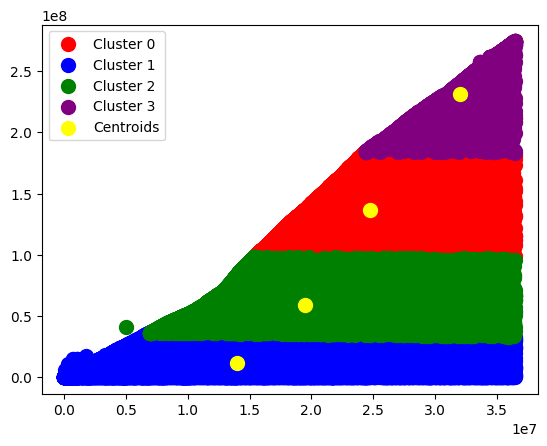

In [20]:
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Now, as much as we like to map all these out, It would be inefficient and the given platform cannot take this many points on a map without crashing. However, there are ways to take the dataframe and pinpoint all the properties on the map and color code them to their cluster. So, we will export this to the folder and tableau will do the work for us.

In [21]:
frame.to_csv(r'/content/gdrive/MyDrive/Datathon/property_data_kmeans.csv')

Export as HTML

In [22]:
%%shell
jupyter nbconvert --to html /content/gdrive/MyDrive/Datathon/property_data_viewer.ipynb

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Datathon/property_data_viewer.ipynb to html
[NbConvertApp] Writing 1054907 bytes to /content/gdrive/MyDrive/Datathon/property_data_viewer.html
